In [1]:
# Importing all important Libraries

import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib as plt

import warnings

warnings.filterwarnings('ignore')

from IPython import display

pd.set_option('display.max_columns',None)

pd.set_option('display.max_rows',None)


## Data Preprocessing :

In [3]:
df = pd.read_csv('consumers-price-index-december-2023-quarter-index-numbers (1).csv')
df.head()

,Series_reference,Period,Data_value,STATUS,UNITS,Subject,Group,Series_title_1,Series_title_2
0,CPIQ.SE901,1914.06,13.167858,FINAL,Index,CPI,CPI Level 1 Groups for New Zealand,Food,NaN
1,CPIQ.SE901,1914.09,0.000000,FINAL,Index,CPI,CPI Level 1 Groups for New Zealand,Food,NaN
2,CPIQ.SE901,1914.12,0.000000,FINAL,Index,CPI,CPI Level 1 Groups for New Zealand,Food,NaN
3,CPIQ.SE901,1915.03,0.000000,FINAL,Index,CPI,CPI Level 1 Groups for New Zealand,Food,NaN
4,CPIQ.SE901,1915.06,0.000000,FINAL,Index,CPI,CPI Level 1 Groups for New Zealand,Food,NaN


## Data Preprocessing :

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21067 entries, 0 to 21066
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Series_reference  21067 non-null  object 
 1   Period            21067 non-null  float64
 2   Data_value        21065 non-null  float64
 3   STATUS            21067 non-null  object 
 4   UNITS             21067 non-null  object 
 5   Subject           21067 non-null  object 
 6   Group             21067 non-null  object 
 7   Series_title_1    21067 non-null  object 
 8   Series_title_2    0 non-null      float64
dtypes: float64(3), object(6)
memory usage: 1.4+ MB


In [5]:
df.describe()

,Period,Data_value,Series_title_2
count,21067.000000,21065.000000,0.0
mean,2004.986354,940.379647,NaN
std,14.835342,1321.047714,NaN
min,1914.060000,0.000000,NaN
25%,1999.060000,652.741514,NaN
50%,2007.120000,930.662558,NaN
75%,2015.120000,1030.400000,NaN
max,2023.120000,27976.190476,NaN


In [6]:
df.nunique()

Series_reference      164
Period                439
Data_value          13512
STATUS                  1
UNITS                   1
Subject                 1
Group                   4
Series_title_1        151
Series_title_2          0
dtype: int64

In [7]:
df.axes

[RangeIndex(start=0, stop=21067, step=1),
 Index(['Series_reference', 'Period', 'Data_value', 'STATUS', 'UNITS',
        'Subject', 'Group', 'Series_title_1', 'Series_title_2'],
       dtype='object')]

In [8]:
df.shape

(21067, 9)

In [9]:
df.columns

Index(['Series_reference', 'Period', 'Data_value', 'STATUS', 'UNITS',
       'Subject', 'Group', 'Series_title_1', 'Series_title_2'],
      dtype='object')

In [10]:
df.shape

(21067, 9)

In [11]:
df.dtypes

Series_reference     object
Period              float64
Data_value          float64
STATUS               object
UNITS                object
Subject              object
Group                object
Series_title_1       object
Series_title_2      float64
dtype: object

In [12]:
df.isna().sum()

Series_reference        0
Period                  0
Data_value              2
STATUS                  0
UNITS                   0
Subject                 0
Group                   0
Series_title_1          0
Series_title_2      21067
dtype: int64

In [17]:
df['Series_title_2'].isna().sum()

21067

In [18]:
df['Series_title_2'].unique()

array([nan])

In [19]:
df['Series_title_2'].value_countscounts()

Series([], Name: Series_title_2, dtype: int64)

In [20]:
df['Series_title_2'].value_counts().to_dict()

{}

In [21]:
df['Series_title_2'].dtypes

dtype('float64')

In [22]:
df['Series_title_2'].isna().sum()

21067

In [24]:
df['Series_title_2'].fillna(99999,inplace = True)

In [25]:
df['Series_title_2'].isna().sum()

0

## Data Visualization :

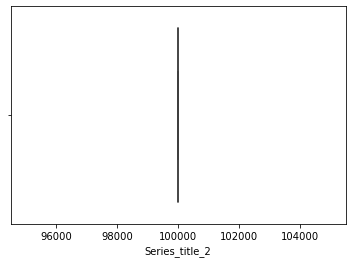

In [28]:
sns.boxplot(df['Series_title_2'])

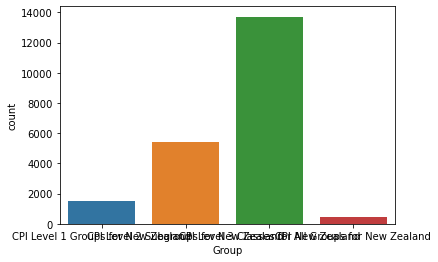

In [29]:
sns.countplot(df['Group'])

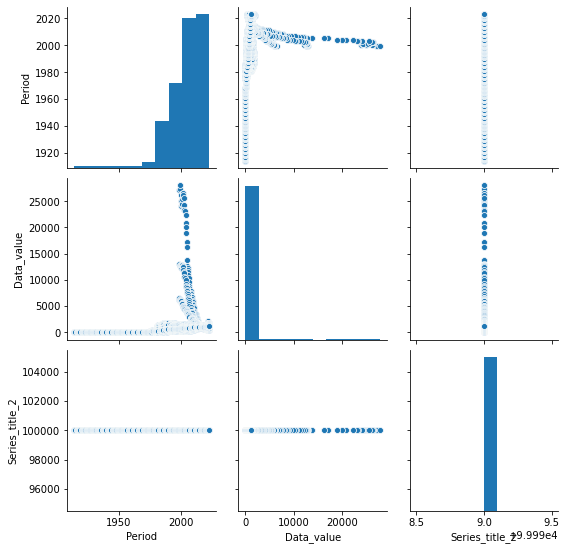

In [30]:
sns.pairplot(df)

## Compairing Numerical Feature with Categorical Features :

In [31]:
df.select_dtypes(include = 'object').head()

,Series_reference,STATUS,UNITS,Subject,Group,Series_title_1
0,CPIQ.SE901,FINAL,Index,CPI,CPI Level 1 Groups for New Zealand,Food
1,CPIQ.SE901,FINAL,Index,CPI,CPI Level 1 Groups for New Zealand,Food
2,CPIQ.SE901,FINAL,Index,CPI,CPI Level 1 Groups for New Zealand,Food
3,CPIQ.SE901,FINAL,Index,CPI,CPI Level 1 Groups for New Zealand,Food
4,CPIQ.SE901,FINAL,Index,CPI,CPI Level 1 Groups for New Zealand,Food


In [32]:
df.select_dtypes(exclude = 'object').head()

,Period,Data_value,Series_title_2
0,1914.06,13.167858,99999.0
1,1914.09,0.000000,99999.0
2,1914.12,0.000000,99999.0
3,1915.03,0.000000,99999.0
4,1915.06,0.000000,99999.0


## Using groupby :

In [33]:
df.groupby('Group').first().head()

,Series_reference,Period,Data_value,STATUS,UNITS,Subject,Series_title_1,Series_title_2
Group,,,,,,,,
CPI All Groups for New Zealand,CPIQ.SE9A,1914.06,12.869674,FINAL,Index,CPI,All groups,99999.0
CPI Level 1 Groups for New Zealand,CPIQ.SE901,1914.06,13.167858,FINAL,Index,CPI,Food,99999.0
CPI Level 2 Subgroups for New Zealand,CPIQ.SE9011,1999.06,592.010478,FINAL,Index,CPI,Fruit and vegetables,99999.0
CPI Level 3 Classes for New Zealand,CPIQ.SE901101,1999.06,602.178091,FINAL,Index,CPI,Fruit,99999.0


## Compairing two features :

In [34]:
pd.crosstab(df['Data_value'],df['Period']).head()

Period,1914.06,1914.09,1914.12,1915.03,1915.06,1915.09,1915.12,1916.03,1916.06,1916.09,1916.12,1917.03,1917.06,1917.09,1917.12,1918.03,1918.06,1918.09,1918.12,1919.03,1919.06,1919.09,1919.12,1920.03,1920.06,1920.09,1920.12,1921.03,1921.06,1921.09,1921.12,1922.03,1922.06,1922.09,1922.12,1923.03,1923.06,1923.09,1923.12,1924.03,1924.06,1924.09,1924.12,1925.03,1925.06,1925.09,1925.12,1926.03,1926.06,1926.09,1926.12,1927.03,1927.06,1927.09,1927.12,1928.03,1928.06,1928.09,1928.12,1929.03,1929.06,1929.09,1929.12,1930.03,1930.06,1930.09,1930.12,1931.03,1931.06,1931.09,1931.12,1932.03,1932.06,1932.09,1932.12,1933.03,1933.06,1933.09,1933.12,1934.03,1934.06,1934.09,1934.12,1935.03,1935.06,1935.09,1935.12,1936.03,1936.06,1936.09,1936.12,1937.03,1937.06,1937.09,1937.12,1938.03,1938.06,1938.09,1938.12,1939.03,1939.06,1939.09,1939.12,1940.03,1940.06,1940.09,1940.12,1941.03,1941.06,1941.09,1941.12,1942.03,1942.06,1942.09,1942.12,1943.03,1943.06,1943.09,1943.12,1944.03,1944.06,1944.09,1944.12,1945.03,1945.06,1945.09,1945.12,1946.03,1946.06,1946.09,1946.12,1947.03,1947.06,1947.09,1947.12,1948.03,1948.06,1948.09,1948.12,1949.03,1949.06,1949.09,1949.12,1950.03,1950.06,1950.09,1950.12,1951.03,1951.06,1951.09,1951.12,1952.03,1952.06,1952.09,1952.12,1953.03,1953.06,1953.09,1953.12,1954.03,1954.06,1954.09,1954.12,1955.03,1955.06,1955.09,1955.12,1956.03,1956.06,1956.09,1956.12,1957.03,1957.06,1957.09,1957.12,1958.03,1958.06,1958.09,1958.12,1959.03,1959.06,1959.09,1959.12,1960.03,1960.06,1960.09,1960.12,1961.03,1961.06,1961.09,1961.12,1962.03,1962.06,1962.09,1962.12,1963.03,1963.06,1963.09,1963.12,1964.03,1964.06,1964.09,1964.12,1965.03,1965.06,1965.09,1965.12,1966.03,1966.06,1966.09,1966.12,1967.03,1967.06,1967.09,1967.12,1968.03,1968.06,1968.09,1968.12,1969.03,1969.06,1969.09,1969.12,1970.03,1970.06,1970.09,1970.12,1971.03,1971.06,1971.09,1971.12,1972.03,1972.06,1972.09,1972.12,1973.03,1973.06,1973.09,1973.12,1974.03,1974.06,1974.09,1974.12,1975.03,1975.06,1975.09,1975.12,1976.03,1976.06,1976.09,1976.12,1977.03,1977.06,1977.09,1977.12,1978.03,1978.06,1978.09,1978.12,1979.03,1979.06,1979.09,1979.12,1980.03,1980.06,1980.09,1980.12,1981.03,1981.06,1981.09,1981.12,1982.03,1982.06,1982.09,1982.12,1983.03,1983.06,1983.09,1983.12,1984.03,1984.06,1984.09,1984.12,1985.03,1985.06,1985.09,1985.12,1986.03,1986.06,1986.09,1986.12,1987.03,1987.06,1987.09,1987.12,1988.03,1988.06,1988.09,1988.12,1989.03,1989.06,1989.09,1989.12,1990.03,1990.06,1990.09,1990.12,1991.03,1991.06,1991.09,1991.12,1992.03,1992.06,1992.09,1992.12,1993.03,1993.06,1993.09,1993.12,1994.03,1994.06,1994.09,1994.12,1995.03,1995.06,1995.09,1995.12,1996.03,1996.06,1996.09,1996.12,1997.03,1997.06,1997.09,1997.12,1998.03,1998.06,1998.09,1998.12,1999.03,1999.06,1999.09,1999.12,2000.03,2000.06,2000.09,2000.12,2001.03,2001.06,2001.09,2001.12,2002.03,2002.06,2002.09,2002.12,2003.03,2003.06,2003.09,2003.12,2004.03,2004.06,2004.09,2004.12,2005.03,2005.06,2005.09,2005.12,2006.03,2006.06,2006.09,2006.12,2007.03,2007.06,2007.09,2007.12,2008.03,2008.06,2008.09,2008.12,2009.03,2009.06,2009.09,2009.12,2010.03,2010.06,2010.09,2010.12,2011.03,2011.06,2011.09,2011.12,2012.03,2012.06,2012.09,2012.12,2013.03,2013.06,2013.09,2013.12,2014.03,2014.06,2014.09,2014.12,2015.03,2015.06,2015.09,2015.12,2016.03,2016.06,2016.09,2016.12,2017.03,2017.06,2017.09,2017.12,2018.03,2018.06,2018.09,2018.12,2019.03,2019.06,2019.09,2019.12,2020.03,2020.06,2020.09,2020.12,2021.03,2021.06,2021.09,2021.12,2022.03,2022.06,2022.09,2022.12,2023.03,2023.06,2023.09,2023.12
Data_value,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.000000,0,2,2,2,2,0,2,2,2,0,2,

## Handling Outliers :

In [ ]:
There is no outliers present in the data to handle.

## Linearity :

In [35]:
import matplotlib
import seaborn
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
df.dtypes

Series_reference     object
Period              float64
Data_value          float64
STATUS               object
UNITS                object
Subject              object
Group                object
Series_title_1       object
Series_title_2      float64
dtype: object

In [37]:
df.head()

,Series_reference,Period,Data_value,STATUS,UNITS,Subject,Group,Series_title_1,Series_title_2
0,CPIQ.SE901,1914.06,13.167858,FINAL,Index,CPI,CPI Level 1 Groups for New Zealand,Food,99999.0
1,CPIQ.SE901,1914.09,0.000000,FINAL,Index,CPI,CPI Level 1 Groups for New Zealand,Food,99999.0
2,CPIQ.SE901,1914.12,0.000000,FINAL,Index,CPI,CPI Level 1 Groups for New Zealand,Food,99999.0
3,CPIQ.SE901,1915.03,0.000000,FINAL,Index,CPI,CPI Level 1 Groups for New Zealand,Food,99999.0
4,CPIQ.SE901,1915.06,0.000000,FINAL,Index,CPI,CPI Level 1 Groups for New Zealand,Food,99999.0


In [39]:
r = df.corr()
r

,Period,Data_value,Series_title_2
Period,1.00000,0.15869,NaN
Data_value,0.15869,1.00000,NaN
Series_title_2,NaN,NaN,NaN


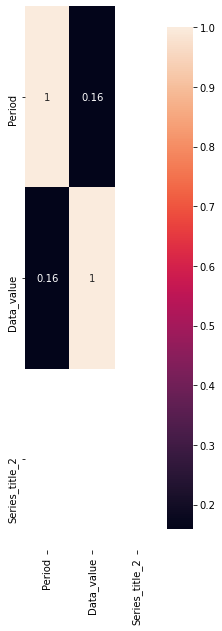

In [40]:
plt.figure(figsize = (3,10))
sns.heatmap(r,annot = True)

## Multicollinearity :

In [42]:
df1 = df.drop('Period',axis = 1)
df1.head()

,Series_reference,Data_value,STATUS,UNITS,Subject,Group,Series_title_1,Series_title_2
0,CPIQ.SE901,13.167858,FINAL,Index,CPI,CPI Level 1 Groups for New Zealand,Food,99999.0
1,CPIQ.SE901,0.000000,FINAL,Index,CPI,CPI Level 1 Groups for New Zealand,Food,99999.0
2,CPIQ.SE901,0.000000,FINAL,Index,CPI,CPI Level 1 Groups for New Zealand,Food,99999.0
3,CPIQ.SE901,0.000000,FINAL,Index,CPI,CPI Level 1 Groups for New Zealand,Food,99999.0
4,CPIQ.SE901,0.000000,FINAL,Index,CPI,CPI Level 1 Groups for New Zealand,Food,99999.0


In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Model Building :

In [44]:
from sklearn.linear_model import LinearRegression

In [ ]:
x = df.drop('DATA_VAL',axis = 1)
y = df['DATA_VAL']


In [46]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2 , random_state=42)

In [49]:
model = LinearRegression()

In [ ]:
model.fit(x_train,y_train) 

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred_train = model.predict(x_train)